In [1]:
import pandas as pd

data = pd.read_csv('data/clusters.csv')

data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


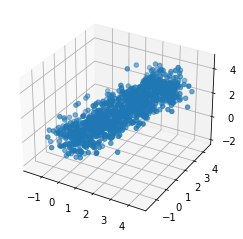

In [3]:
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')

ax.scatter(data['A'], data['B'], data['C'])
plt.show()

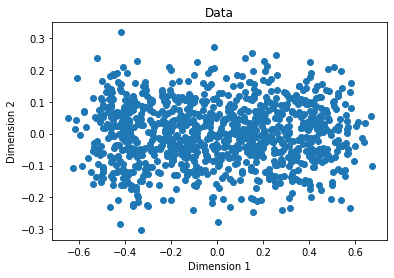

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaled_features = MinMaxScaler().fit_transform(data)

pca = PCA(n_components= 2).fit(scaled_features)
features_2d = pca.transform(scaled_features)

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(features_2d[:, 0], features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()


[[0.25405972 0.3340625  0.29330502]
 [0.09393923 0.1785612  0.3021151 ]
 [0.71521216 0.59990379 0.75838262]
 ...
 [0.66241894 0.56024627 0.55320773]
 [0.22966477 0.2637139  0.30285353]
 [0.65912144 0.62517441 0.63406712]]


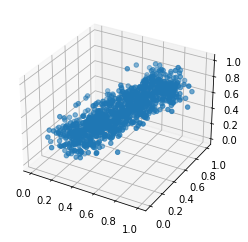

In [10]:
print(scaled_features)
ax = plt.axes(projection = '3d')
ax.scatter(scaled_features[:, 0], scaled_features[:, 1], scaled_features[:, 2])
plt.show()

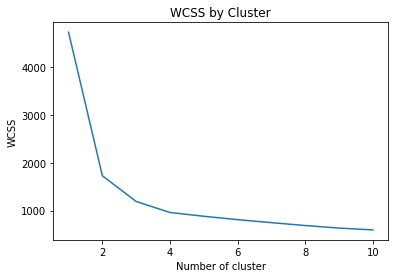

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

#creater 10 models with 1 to 10 cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i)
    
    kmeans.fit(data)
    
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("WCSS by Cluster")
plt.xlabel('Number of cluster')
plt.ylabel("WCSS")
plt.show()

In [13]:
from sklearn.cluster import KMeans

#create a model based on 4 centroids
model = KMeans(n_clusters= 4, init= 'k-means++', n_init=500, max_iter= 1500)

km_clusters = model.fit_predict(data)
km_clusters

array([0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 3, 3, 1, 1, 1, 2, 3, 1, 1, 0, 1,
       0, 0, 1, 3, 2, 0, 3, 1, 3, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 3,
       2, 0, 0, 2, 2, 1, 0, 3, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1,
       3, 1, 3, 2, 3, 1, 1, 2, 3, 1, 1, 1, 0, 3, 1, 3, 2, 3, 1, 2, 3, 1,
       1, 3, 3, 3, 2, 1, 3, 1, 2, 1, 2, 3, 1, 3, 2, 3, 1, 3, 2, 1, 1, 2,
       1, 3, 0, 0, 3, 2, 3, 2, 0, 3, 1, 3, 2, 2, 0, 1, 3, 1, 2, 0, 3, 3,
       3, 1, 3, 3, 1, 0, 1, 3, 0, 3, 3, 0, 2, 2, 1, 2, 1, 1, 2, 0, 0, 1,
       0, 3, 0, 1, 1, 1, 3, 0, 2, 2, 1, 3, 3, 0, 0, 2, 0, 3, 1, 2, 1, 3,
       3, 1, 1, 0, 1, 0, 3, 3, 1, 2, 0, 2, 2, 3, 3, 0, 3, 1, 2, 3, 1, 1,
       0, 2, 3, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 3, 0, 2, 1, 1, 2, 0, 2,
       1, 0, 3, 2, 3, 1, 3, 0, 3, 0, 1, 0, 3, 1, 0, 2, 2, 0, 2, 3, 2, 3,
       2, 1, 1, 3, 2, 0, 0, 1, 2, 1, 3, 3, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1,
       0, 1, 3, 3, 3, 1, 2, 0, 1, 3, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 2,
       2, 3, 2, 0, 0, 3, 0, 2, 2, 2, 1, 1, 3, 0, 2,

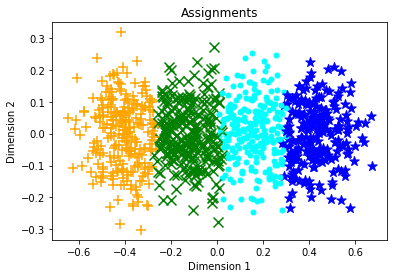

In [16]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange', 3:'cyan'}
    mrk_dic = {0:'*',1:'x',2:'+', 3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

In [17]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_model.fit_predict(data)
agg_clusters

array([1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 3, 3, 2, 0, 2, 2, 3, 3, 2, 1, 2,
       1, 1, 2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 1, 3, 2, 2, 0, 3,
       0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 2, 1, 2, 2, 3, 0, 3, 2, 0, 3, 2,
       2, 3, 3, 3, 2, 2, 3, 2, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 0,
       2, 3, 1, 1, 3, 0, 3, 0, 1, 3, 2, 3, 0, 2, 1, 2, 3, 2, 0, 1, 3, 3,
       2, 2, 3, 3, 2, 1, 2, 3, 1, 3, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2,
       1, 3, 1, 2, 2, 2, 1, 1, 0, 0, 2, 3, 3, 1, 1, 0, 1, 3, 2, 0, 2, 1,
       3, 2, 3, 1, 2, 1, 2, 3, 3, 0, 1, 2, 0, 3, 3, 1, 3, 2, 0, 3, 2, 2,
       1, 0, 3, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 3, 1, 0, 3, 2, 0, 1, 0,
       2, 1, 1, 0, 3, 2, 3, 1, 3, 1, 2, 1, 3, 2, 1, 0, 0, 1, 2, 3, 2, 3,
       0, 2, 2, 1, 0, 1, 1, 3, 0, 2, 3, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2,
       1, 2, 3, 1, 3, 2, 0, 1, 2, 3, 1, 3, 0, 2, 2, 1, 0, 0, 3, 1, 1, 0,
       0, 3, 0, 1, 1, 3, 1, 2, 0, 0, 2, 2, 3, 1, 2,

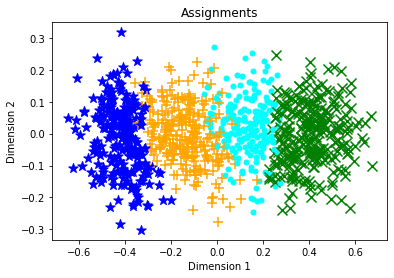

In [18]:
plot_clusters(features_2d, agg_clusters)